In [1]:
# import packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

import pickle
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

**Find the original data here:**
https://opendata-downloads.s3.amazonaws.com/opa_properties_public.csv

**Find the data codebook here**:
https://metadata.phila.gov/#home/datasetdetails/5543865f20583086178c4ee5/representationdetails/55d624fdad35c7e854cb21a4/?view_287_page=1

In [2]:
# read original data
df = pd.read_csv('opa_properties_public.csv', header=0)
print(df.shape)
print(df.columns)
df.head()

(581191, 78)
Index(['objectid', 'assessment_date', 'basements', 'beginning_point',
       'book_and_page', 'building_code', 'building_code_description',
       'category_code', 'category_code_description', 'census_tract',
       'central_air', 'cross_reference', 'date_exterior_condition', 'depth',
       'exempt_building', 'exempt_land', 'exterior_condition', 'fireplaces',
       'frontage', 'fuel', 'garage_spaces', 'garage_type',
       'general_construction', 'geographic_ward', 'homestead_exemption',
       'house_extension', 'house_number', 'interior_condition', 'location',
       'mailing_address_1', 'mailing_address_2', 'mailing_care_of',
       'mailing_city_state', 'mailing_street', 'mailing_zip', 'market_value',
       'market_value_date', 'number_of_bathrooms', 'number_of_bedrooms',
       'number_of_rooms', 'number_stories', 'off_street_open',
       'other_building', 'owner_1', 'owner_2', 'parcel_number', 'parcel_shape',
       'quality_grade', 'recording_date', 'registry_nu

,objectid,assessment_date,basements,beginning_point,book_and_page,building_code,building_code_description,category_code,category_code_description,census_tract,central_air,cross_reference,date_exterior_condition,depth,exempt_building,exempt_land,exterior_condition,fireplaces,frontage,fuel,garage_spaces,garage_type,general_construction,geographic_ward,homestead_exemption,house_extension,house_number,interior_condition,location,mailing_address_1,mailing_address_2,mailing_care_of,mailing_city_state,mailing_street,mailing_zip,market_value,market_value_date,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,off_street_open,other_building,owner_1,owner_2,parcel_number,parcel_shape,quality_grade,recording_date,registry_number,sale_date,sale_price,separate_utilities,sewer,site_type,state_code,street_code,street_designation,street_direction,street_name,suffix,taxable_building,taxable_land,topography,total_area,total_livable_area,type_heater,unfinished,unit,utility,view_type,year_built,year_built_estimate,zip_code,zoning,pin,lat,lng
0,96022750,2022-03-08 14:22:35,NaN,SWC REED ST,53764990.0,SR,VACANT LAND RESIDE < ACRE,14,NaN,32.0,NaN,NaN,NaN,NaN,100.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,1428,NaN,1428L S TAYLOR ST,100 W OXFORD ST E-2300,NaN,NaN,PHILADELPHIA PA,NaN,19122,100.0,NaN,NaN,NaN,NaN,NaN,2824.0,NaN,MAMIE NICHOLS LIMITED PARTNERSHIP,NaN,886000016,E,NaN,2021-12-16 00:00:00,10S23 37,2020-12-10 00:00:00,1.0,NaN,NaN,NaN,PA,76780,ST,S,TAYLOR,L,0.0,0.0,F,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN,NaN,19146.0,RSA5,1001681390,-75.185501,39.934553
1,96022751,2022-03-08 14:16:10,NaN,SWC REED ST,53764990.0,SR,VACANT LAND RESIDE < ACRE,2,Multi Family,32.0,NaN,NaN,NaN,NaN,29400.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,1419,NaN,1419L S TAYLOR ST,100 W OXFORD ST E-2300,NaN,NaN,PHILADELPHIA PA,NaN,19122,29400.0,NaN,NaN,NaN,NaN,NaN,2824.0,NaN,MAMIE NICHOLS LIMITED PARTNERSHIP,NaN,886000015,E,NaN,2021-12-16 00:00:00,10S23 37,2020-12-10 00:00:00,1.0,NaN,NaN,NaN,PA,76780,ST,S,TAYLOR,L,0.0,0.0,F,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN,NaN,19146.0,RSA5,1001681388,-75.185177,39.934722
2,96022752,2022-03-08 14:14:15,NaN,SWC REED ST,53764990.0,SR,VACANT LAND RESIDE < ACRE,14,NaN,32.0,NaN,NaN,NaN,NaN,14200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,1410,NaN,1410L S TAYLOR ST,100 W OXFORD ST SUITE E-2300,NaN,NaN,PHILADELPHIA PA,NaN,19122,14200.0,NaN,NaN,NaN,NaN,NaN,2824.0,NaN,MAMIE NICHOLS LIMITED PARTNERSHIP,NaN,886000013,E,NaN,2021-12-16 00:00:00,10S23 37,2020-12-10 00:00:00,1.0,NaN,NaN,NaN,PA,76780,ST,S,TAYLOR,L,0.0,0.0,F,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN,NaN,19146.0,RSA5,1001681384,-75.185423,39.934910
3,96022753,2022-03-08 14:08:24,NaN,SWC REED ST,53764990.0,SR,VACANT LAND RESIDE < ACRE,6,Vacant Land,32.0,NaN,NaN,NaN,NaN,0.0,5200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,1410,NaN,1410 S TAYLOR ST,100 W OXFORD ST SUITE E-2300,NaN,NaN,PHILADELPHIA PA,NaN,19122,5200.0,NaN,NaN,NaN,NaN,NaN,2824.0,NaN,COMMUNITY JUSTICE LAND TRUST,NaN,886000012,E,NaN,2021-12-16 00:00:00,10S23 37,2020-12-10 00:00:00,1.0,NaN,NaN,NaN,PA,76780,ST,S,TAYLOR,NaN,0.0,0.0,F,681.0,NaN,NaN,NaN,NaN,NaN,I,NaN,NaN,19146.0,RSA5,1001681383,-75.185423,39.934910
4,96022754,2022-03-08 14:14:36,NaN,SWC REED ST,53764990.0,SR,VACANT LAND RESIDE < ACRE,6,Vacant Land,32.0,NaN,NaN,NaN,NaN,0.0,21000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,1413,NaN,1413 S TAYLOR ST,100 W OXFORD ST SUITE E2300,NaN,NaN,PHILADELPHIA PA,NaN,19122,21000.0,NaN,NaN,NaN,NaN,NaN,2824.0,NaN,COMMUNITY JUSTICE LAND TRUST,NaN,886857100,E,NaN,2021-12-16 00:00:00,10S23 37,2020-12-10 00:00:00,1.0,NaN,NaN,NaN,PA,76780,ST,S,TAYLOR,NaN,0.0,0.0,F,712.0,NaN,NaN,NaN,NaN,NaN,I,NaN,NaN,19146.0,RSA5,1001681385,-75.185151,39.934839


### Step 1: prescreen related columns and rows 

**1.1 remove clearly unrelated columns**

**Columns kept after step 1.1**:\
'assessment_date', 'basements', 'category_code_description','census_tract', 'central_air',\
'depth', 'exterior_condition', 'fireplaces', 'frontage', 'fuel',\
'garage_spaces', 'garage_type', 'geographic_ward', 'house_number', 'interior_condition',\
'market_value', 'market_value_date', 'number_of_bathrooms', 'number_of_bedrooms', 'number_of_rooms',\
'number_stories', 'quality_grade', 'sale_date', 'sale_price', 'separate_utilities',\
'sewer', 'site_type', 'street_designation','street_direction', 'topography',\
'total_area','total_livable_area', 'type_heater', 'unfinished', 'unit',\
'utility', 'view_type', 'year_built', 'zip_code', 'lat',\
'lng'

In [3]:
# place columns of interest into a list
cols_step11 = ['assessment_date', 'basements', 'category_code_description','census_tract', 'central_air',
              'depth', 'exterior_condition', 'fireplaces', 'frontage', 'fuel', 
              'garage_spaces', 'garage_type', 'geographic_ward', 'house_number', 'interior_condition', 
              'market_value', 'market_value_date', 'number_of_bathrooms', 'number_of_bedrooms', 'number_of_rooms',
              'number_stories', 'quality_grade', 'sale_date', 'sale_price', 'separate_utilities',
              'sewer', 'site_type', 'street_designation','street_direction', 'topography', 
              'total_area','total_livable_area', 'type_heater', 'unfinished', 'unit', 
              'utility', 'view_type', 'year_built', 'zip_code', 'lat', 
              'lng']
print(len(cols_step11))
data_step11 = df[cols_step11]

41


**1.2 drop columns with more than 50% missing values**

In [4]:
# compute percentage of missing values for each column
data_step11.isnull().sum()/len(data_step11)

assessment_date              0.940806
basements                    0.437612
category_code_description    0.000241
census_tract                 0.000071
central_air                  0.505662
depth                        0.001173
exterior_condition           0.047583
fireplaces                   0.007855
frontage                     0.001182
fuel                         0.973475
garage_spaces                0.008280
garage_type                  0.137328
geographic_ward              0.000071
house_number                 0.000000
interior_condition           0.048943
market_value                 0.000372
market_value_date            1.000000
number_of_bathrooms          0.007688
number_of_bedrooms           0.007042
number_of_rooms              0.057768
number_stories               0.007030
quality_grade                0.902956
sale_date                    0.000002
sale_price                   0.000019
separate_utilities           0.955760
sewer                        0.984511
site_type   

In [5]:
# drop columns with over 50% missing values
data_step12 = data_step11.drop(['assessment_date', 'fuel', 'market_value_date', 'quality_grade', 'separate_utilities', 
                              'sewer', 'street_direction', 'unfinished', 'unit', 'utility'], axis = 1)
print(len(data_step12.columns))
print(data_step12.columns)
print(data_step12.info())

31
Index(['basements', 'category_code_description', 'census_tract', 'central_air',
       'depth', 'exterior_condition', 'fireplaces', 'frontage',
       'garage_spaces', 'garage_type', 'geographic_ward', 'house_number',
       'interior_condition', 'market_value', 'number_of_bathrooms',
       'number_of_bedrooms', 'number_of_rooms', 'number_stories', 'sale_date',
       'sale_price', 'site_type', 'street_designation', 'topography',
       'total_area', 'total_livable_area', 'type_heater', 'view_type',
       'year_built', 'zip_code', 'lat', 'lng'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581191 entries, 0 to 581190
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   basements                  326855 non-null  object 
 1   category_code_description  581051 non-null  object 
 2   census_tract               581150 non-null  float64
 3   central_air         

**1.3 drop rows where sale_date or sale_price is missing**

In [6]:
data_step13 = data_step12[data_step12['sale_date'].notna()]
data_step13 = data_step13[data_step13['sale_price'].notna()]


**1.4 read in data whose 'category_code_description' is 'Multi Family' or 'Single Family'**

In [7]:
data_step14 = data_step13.query('category_code_description == "Multi Family"|category_code_description == "Single Family"')
print(data_step14.shape)

(504534, 31)


In [8]:
data_step1_final = data_step14
print(data_step1_final.shape)

(504534, 31)


### Step 2: recode categorical data

**2 replace and combine category**

In [9]:
data_step2 = data_step1_final

In [10]:
# feature 0: basements
data_step2['basements'] = data_step1_final['basements'].replace({'0':'None','1':'full','2':'full','3':'full','4':'full',
                                                        'A':'full', 'B': 'full','C': 'full','D': 'full','E':'partial',
                                                        'F':'partial','G':'partial','H':'partial','I':'full',
                                                        'J':'partial'})
print(data_step2['basements'].value_counts(dropna=False))

NaN        185484
full       163070
partial    145510
None        10470
Name: basements, dtype: int64


In [11]:
# feature 1: category_code_description
print(data_step2.category_code_description.value_counts(dropna=False))

Single Family    462050
Multi Family      42484
Name: category_code_description, dtype: int64


In [12]:
# feature 3: central_air
data_step2['central_air'] = data_step1_final['central_air'].replace({'0': 'N', '1': 'Y','Y': 'Y', 'N': 'N'})
print(data_step2['central_air'].value_counts(dropna=False))

NaN    224636
N      168177
Y      111721
Name: central_air, dtype: int64


In [13]:
# feature 5: exterior_condition
data_step2['exterior_condition'] = data_step1_final['exterior_condition'].replace({0:'none',1:'new',2:'rehabbed',
                                                                          3:'above average',4:'rehabbed',5:'average', 
                                                                          6: 'below average',7:'vacant',8:'sealed',
                                                                          9:'compromised'})
print(data_step2.exterior_condition.value_counts(dropna=False))

rehabbed         426452
above average     41564
average           14755
new               13330
vacant             5055
below average      2576
NaN                 431
none                371
Name: exterior_condition, dtype: int64


In [14]:
# feature 9: garage_type
data_step2['garage_type'] = data_step1_final['garage_type'].replace({'A':'builtin', 'B':'attached','C':'detached',
                                                            'F':'converted', 'S':'selfpark', 'T':'attendant',
                                                            '0':'none', '0.0':'none', 0.0:'none',
                                                            '1':'builtin', '1.0':'builtin', 1.0:'builtin',
                                                            '2':'attached', '2.0':'attached', 2.0:'attached',
                                                            '3':'detached', '3.0':'detached', 3.0:'detached'})
print(data_step2.garage_type.value_counts(dropna=False))

none         276922
builtin      140048
NaN           34555
converted     22770
detached      18512
attached       8448
selfpark       2574
attendant       705
Name: garage_type, dtype: int64


In [15]:
# feature 11: house_number
data_step2['house_number'] = np.where(data_step2['house_number']%2==0, 'South or West', 'North or East')

In [16]:
data_step2.house_number.value_counts(dropna=False)

South or West    254544
North or East    249990
Name: house_number, dtype: int64

In [17]:
# feature 12: interior_condition
data_step2['interior_condition'] = data_step1_final['interior_condition'].replace({0:'none',1:'new',2:'new',
                                                                          3:'above average',4:'average', 
                                                                          5:'below average',6:'vacant',7:'sealed'})
print(data_step2.exterior_condition.value_counts(dropna=False))

rehabbed         426452
above average     41564
average           14755
new               13330
vacant             5055
below average      2576
NaN                 431
none                371
Name: exterior_condition, dtype: int64


In [18]:
# feature 20: site_type
data_step2['site_type'].value_counts(dropna=False)

NaN    243195
A      235162
B       25477
D         380
C         246
E          37
G          33
F           4
Name: site_type, dtype: int64

In [19]:
# feaure 21: street_designation
data_step2['street_designation'] = data_step1_final['street_designation'].astype("string")
data_step2['street_designation'] = np.where(data_step1_final['street_designation'].str.match("ST"), "ST",
                                   np.where(data_step1_final['street_designation'].str.match("AVE"), "AVE",
                                   np.where(data_step1_final['street_designation'].str.match("RD"), "RD",
                                   np.where(data_step1_final['street_designation'].str.match("LA"), "LA",
                                   np.where(data_step1_final['street_designation'].str.match("DR"), "DR",
                                   np.where(data_step1_final['street_designation'].str.match("PL"), "PL",
                                   np.where(data_step1_final['street_designation'].str.match("SQ"), "SQ","Other")))))))
data_step2['street_designation'].value_counts(dropna=False)

ST       371848
AVE       73015
RD        29494
Other      8613
LA         7599
PL         5819
DR         5777
SQ         2369
Name: street_designation, dtype: int64

In [20]:
# feature 22: topography      
data_step2['topography'] = data_step1_final['topography'].replace({'0':'None'})
data_step2['topography'].value_counts(dropna=False)

F       438002
NaN      33402
A        28192
E         4441
B          235
C          158
D          103
None         1
Name: topography, dtype: int64

In [21]:
# feature 25: type_heater  
data_step2['type_heater'] = data_step1_final['type_heater'].replace({'0':'None'})
data_step2['type_heater'].value_counts(dropna=False)

NaN     218207
H       119431
A        96924
B        59232
G         4772
C         2916
None      1760
E          727
D          565
Name: type_heater, dtype: int64

In [22]:
# feature 26: view_type 
data_step2['view_type'] = data_step1_final['view_type'].replace({'0':'None'})
data_step2['view_type'].value_counts(dropna=False)

I       467613
A        14664
C         7510
None      3634
H         2658
D         2530
NaN       2270
E         1911
B         1744
Name: view_type, dtype: int64

In [23]:
data_step2_final = data_step2
print(data_step2_final.shape)

(504534, 31)


In [53]:
data_step2.columns

Index(['basements', 'category_code_description', 'census_tract', 'central_air',
       'depth', 'exterior_condition', 'fireplaces', 'frontage',
       'garage_spaces', 'garage_type', 'geographic_ward', 'house_number',
       'interior_condition', 'market_value', 'number_of_bathrooms',
       'number_of_bedrooms', 'number_of_rooms', 'number_stories', 'sale_date',
       'sale_price', 'site_type', 'street_designation', 'topography',
       'total_area', 'total_livable_area', 'type_heater', 'view_type',
       'year_built', 'zip_code', 'lat', 'lng', 'sale_year', 'sale_month',
       'sale_week', 'sale_day', 'sale_dow'],
      dtype='object')

### Step 3: transform numerical data

**3 transform numerical data**

In [24]:
data_step3 = data_step2_final

In [25]:
# sale_date into sale_year, sale_month, sale_week, sale_day and sale_dow 
data_step3['sale_date'] = pd.to_datetime(data_step2_final['sale_date'])
data_step3['sale_year'] = data_step2_final['sale_date'].dt.year
data_step3['sale_month'] = data_step2_final['sale_date'].dt.month
data_step3['sale_week'] = data_step2_final['sale_date'].dt.isocalendar().week
data_step3['sale_week'] = data_step2_final['sale_week'].astype(int)
data_step3['sale_day'] = data_step2_final['sale_date'].dt.day
data_step3['sale_dow'] = data_step2_final['sale_date'].dt.dayofweek
data_step3 = data_step3.drop(['sale_date'], axis=1)

In [26]:
# year_built to age
data_step3['year_built'] = data_step2_final['year_built'].replace('196Y', np.NaN)
data_step3['age'] = 2022 - pd.to_numeric(data_step3["year_built"])
data_step3 = data_step3.drop(['year_built'], axis=1)

In [27]:
# bath_bed_ratio
data_step3['bath_bed_ratio'] = data_step2_final['number_of_bathrooms']/data_step2_final['number_of_bedrooms']

In [28]:
# bath_total_ratio
data_step3['bath_total_ratio'] = data_step2_final['number_of_bathrooms']/data_step2_final['number_of_rooms']

In [29]:
# bed_total_ratio
data_step3['bed_total_ratio'] = data_step2_final['number_of_bedrooms']/data_step2_final['number_of_rooms']

In [30]:
# livable_area_ratio
data_step3['livable_area_ratio'] = data_step2_final['total_livable_area']/data_step2_final['total_area']

27


<AxesSubplot:>

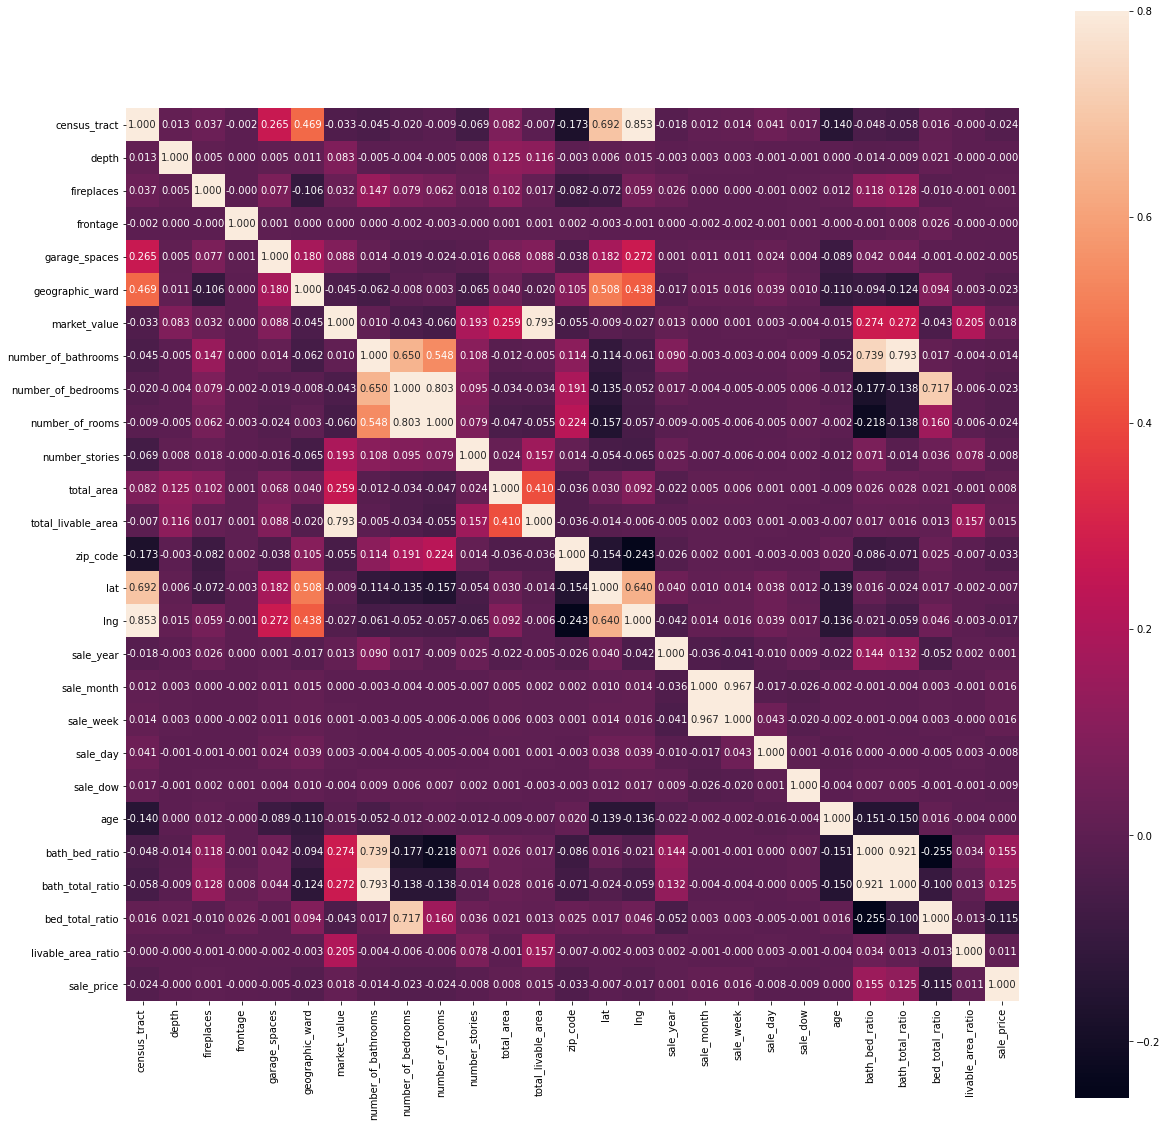

In [31]:
num_feat_1 = ['census_tract','depth', 'fireplaces', 'frontage', 'garage_spaces',
              'geographic_ward', 'market_value','number_of_bathrooms','number_of_bedrooms', 'number_of_rooms',
              'number_stories', 'total_area', 'total_livable_area', 'zip_code',
              'lat', 'lng','sale_year','sale_month','sale_week', 
              'sale_day','sale_dow', 'age','bath_bed_ratio', 'bath_total_ratio', 'bed_total_ratio',
              'livable_area_ratio', 'sale_price']
print(len(num_feat_1))
corr = data_step3[num_feat_1].corr()
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, vmax=0.8, annot=True, fmt='.3f', square=True)

In [32]:
# change 1: remove census_tract
data_step3 = data_step3.drop(['census_tract'], axis=1)

In [33]:
# change 2: remove bath_bed_ratio
data_step3 = data_step3.drop(['bath_bed_ratio'], axis=1)

In [34]:
# change 3: change sale_week to week number of month and remove sale_day 
data_step3['sale_week'] = data_step3['sale_day']//7+1
data_step3 = data_step3.drop(['sale_day'],axis=1)

24


<AxesSubplot:>

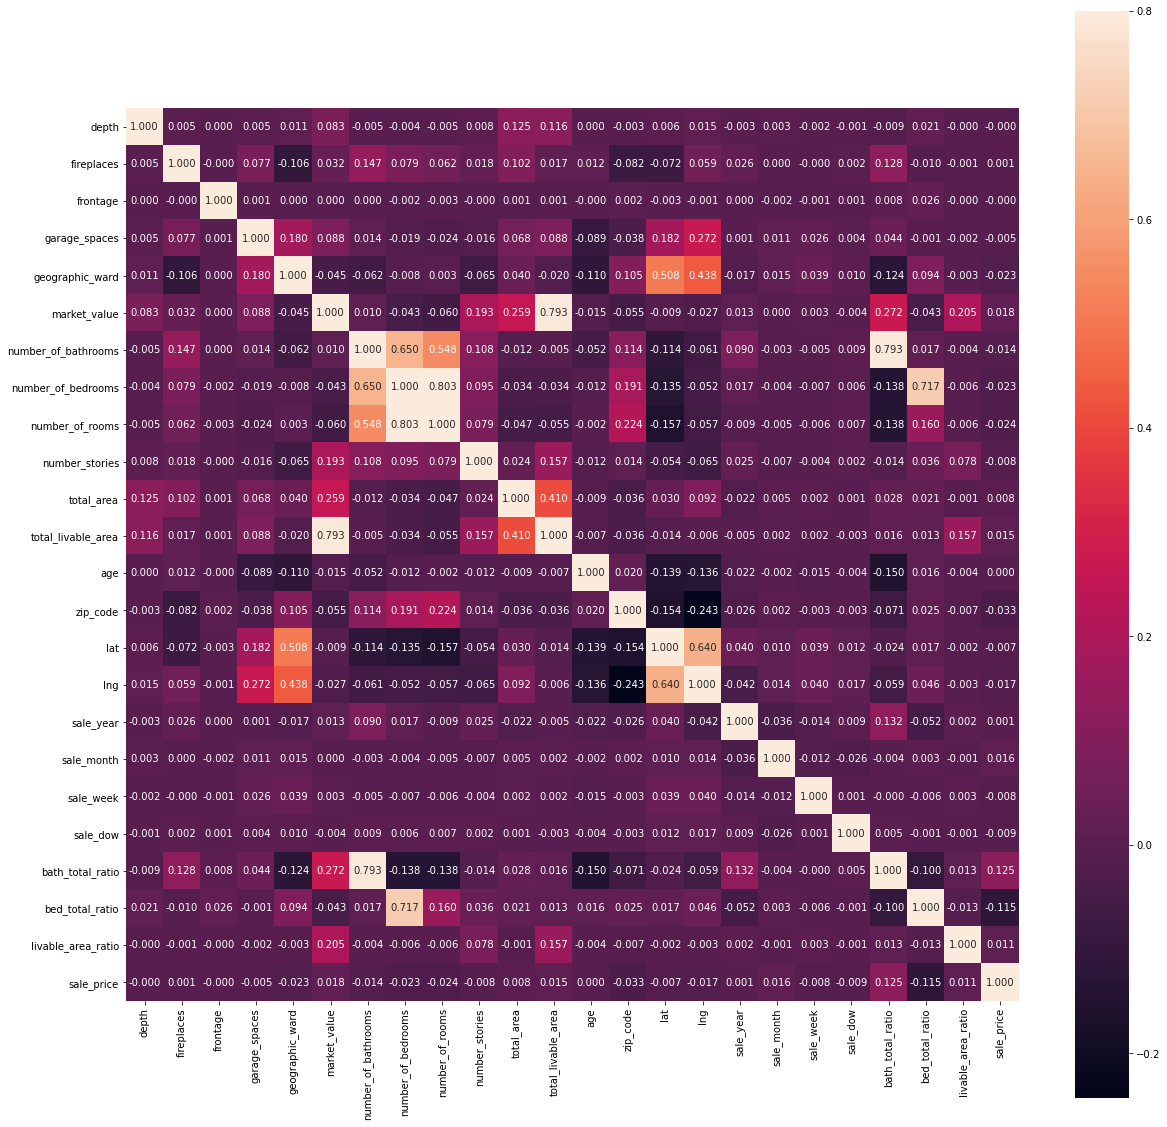

In [35]:
num_feat_2 = ['depth', 'fireplaces', 'frontage', 'garage_spaces','geographic_ward', 
              'market_value', 'number_of_bathrooms','number_of_bedrooms', 'number_of_rooms','number_stories', 
              'total_area', 'total_livable_area','age', 'zip_code','lat', 
              'lng','sale_year','sale_month','sale_week','sale_dow', 
              'bath_total_ratio', 'bed_total_ratio','livable_area_ratio', 'sale_price']
print(len(num_feat_2))
corr = data_step3[num_feat_2].corr()
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, vmax=0.8, annot=True, fmt='.3f', square=True)

In [36]:
data_step3.loc[data_step3['bath_total_ratio']==data_step3['bath_total_ratio'].max(),'bath_total_ratio']=data_step3['bath_total_ratio'].median()

In [37]:
data_step3.loc[data_step3['bed_total_ratio']==data_step3['bed_total_ratio'].max(),'bed_total_ratio']=data_step3['bed_total_ratio'].median()

In [38]:
data_step3.loc[data_step3['livable_area_ratio']==data_step3['livable_area_ratio'].max(),'livable_area_ratio']=data_step3['livable_area_ratio'].median()

In [39]:
data_step3_final = data_step3
print(data_step3_final.shape)

(504534, 36)


In [40]:
data_step3_final.to_csv('eda.csv')

### Step 4:  drop extreme high sale price

**4 drop rows with sales price of greater than $5 million**

In [41]:
data_step4 = data_step3_final[(data_step3_final['sale_price']>1000)&(data_step3_final['sale_price']<5000000)]

In [42]:
data_step4_final = data_step4
print(data_step4_final.shape)

(358284, 36)


### Step 5: split into training, validation and test set

**5 split the data into training and test sets:   
The training and validation dataset contains all rows with house sold during the years of 2010 - 2019.    
The test dataset contains all rows with house sold during 2020 and 2021.**

In [43]:
# first subset the data only to 2010 - 2021
data_step5 = data_step4_final[data_step4_final['sale_year'] > 2009]
data_step5.shape

(180293, 36)

In [44]:
# get training plus validation set 
X_train = data_step5[data_step5['sale_year'] < 2020].drop(['sale_price'],axis=1)
y_train = data_step5.loc[X_train.index, 'sale_price']
print(X_train.shape)
print(y_train.shape)

(150569, 35)
(150569,)


In [45]:
# get test set 
X_test = data_step5[data_step5['sale_year'] > 2019].drop(['sale_price'],axis=1)
y_test = data_step5.loc[X_test.index, 'sale_price']
print(X_test.shape)
print(y_test.shape)

(29724, 35)
(29724,)


In [46]:
# get training and validation set
X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)
print(X_train_train.shape)
print(X_train_val.shape)
print(y_train_train.shape)
print(y_train_val.shape)

(120455, 35)
(30114, 35)
(120455,)
(30114,)


### Step 6: process training data 

**for training data:\
categorical features: fill in mode then one hot encode\
numercial features: fill in median then standardize**

In [47]:
# for categorical data, fill missing values with mode and then one-hot encode
cat_features = ['basements', 'category_code_description', 'central_air', 'exterior_condition', 'garage_type', 
                'house_number','interior_condition', 'site_type','street_designation', 'topography', 
                'type_heater', 'view_type']
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore',sparse=False))
])

# for numerical data, fill missing values with median and then scale
num_features = ['depth', 'fireplaces', 'frontage', 'garage_spaces','geographic_ward', 
                'market_value', 'number_of_bathrooms','number_of_bedrooms', 'number_of_rooms','number_stories', 
                'total_area', 'total_livable_area', 'zip_code','lat', 'lng',
                'sale_year','sale_month','sale_week','sale_dow', 'age',
                'bath_total_ratio', 'bed_total_ratio','livable_area_ratio']
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler())
])

# Combine two transformers into single ColumnTransformer preprocessor
preprocessor = ColumnTransformer([
    ('cat', cat_pipe, cat_features),
    ('num', num_pipe, num_features)
])

In [48]:
# use pipeline to fit training data
preprocessor_train = preprocessor.fit(X_train_train)

# prepare column names
cat_columns = preprocessor.named_transformers_['cat']['encoder'].get_feature_names(cat_features)
columns = np.append(cat_columns, num_features)

# preprocess training data
X_train_train_final = pd.DataFrame(preprocessor_train.transform(X_train_train), index=X_train_train.index, columns=columns)
y_train_train_final = y_train_train/1000

In [49]:
X_train_train_final.to_csv('X_train.csv')
y_train_train_final.to_csv('y_train.csv')

### Step 7: process validation and test data 

**use statistical traits in training data to process validation and test data**

In [50]:
# preprocess validation data
X_train_val_final = pd.DataFrame(preprocessor_train.transform(X_train_val), index=X_train_val.index, columns=columns)
y_train_val_final = y_train_val/1000

# preprocess test data
X_test_final = pd.DataFrame(preprocessor_train.transform(X_test), index=X_test.index, columns=columns)
y_test_final = y_test/1000

In [51]:
X_train_val_final.to_csv('X_val.csv')
y_train_val_final.to_csv('y_val.csv')
X_test_final.to_csv('X_test.csv')
y_test_final.to_csv('y_test.csv')

In [52]:
print(X_train_train_final.shape)
print(X_train_val_final.shape)
print(X_test_final.shape)
print(y_train_train_final.shape)
print(y_train_val_final.shape)
print(y_test_final.shape)

(120455, 90)
(30114, 90)
(29724, 90)
(120455,)
(30114,)
(29724,)
